# 1. Install required libraries 

In [392]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [393]:
data = pd.read_csv('data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [394]:
data.shape

(1460, 81)

In [395]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [396]:
# Define and print columns with  NaN values 
nans = pd.concat([data.isnull().sum(), data.isnull().sum() / data.shape[0]], axis=1, keys=['Train', 'Percentage'])
print(nans[nans.sum(axis=1) > 0])

              Train  Percentage
LotFrontage     259    0.177397
Alley          1369    0.937671
MasVnrType        8    0.005479
MasVnrArea        8    0.005479
BsmtQual         37    0.025342
BsmtCond         37    0.025342
BsmtExposure     38    0.026027
BsmtFinType1     37    0.025342
BsmtFinType2     38    0.026027
Electrical        1    0.000685
FireplaceQu     690    0.472603
GarageType       81    0.055479
GarageYrBlt      81    0.055479
GarageFinish     81    0.055479
GarageQual       81    0.055479
GarageCond       81    0.055479
PoolQC         1453    0.995205
Fence          1179    0.807534
MiscFeature    1406    0.963014


In [397]:
# Drop features with missed more than 20% of values and 'Id' 
data.drop(['Id', 'LotFrontage','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [398]:
data.shape

(1460, 74)

In [399]:
# Correlation matrix

In [400]:
# Pairplot

In [401]:
# Define not numerical fearures
cat_features = []
for i in data.columns:
    if (data[i].dtypes == object):
        cat_features.append(i)
print(cat_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [402]:
data_1 = data.drop(cat_features, axis=1)

In [403]:
data_1.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [404]:
data_1.shape

(1460, 36)

In [405]:
data_2 = data_1.dropna()

In [406]:
data_2.shape

(1371, 36)

In [407]:
data_2.columns.shape

(36,)

In [408]:
y = data_2['SalePrice']
X = data_2.drop('SalePrice', axis=1)

In [409]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
model = linear.fit(X_train, y_train)

In [410]:
predictions = model.predict(X_test)

In [411]:
# Define MAPE 

In [412]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [413]:
mean_absolute_percentage_error(y_test, predictions)

12.585896731514609

In [414]:
# Dropping high correlated data from data_2

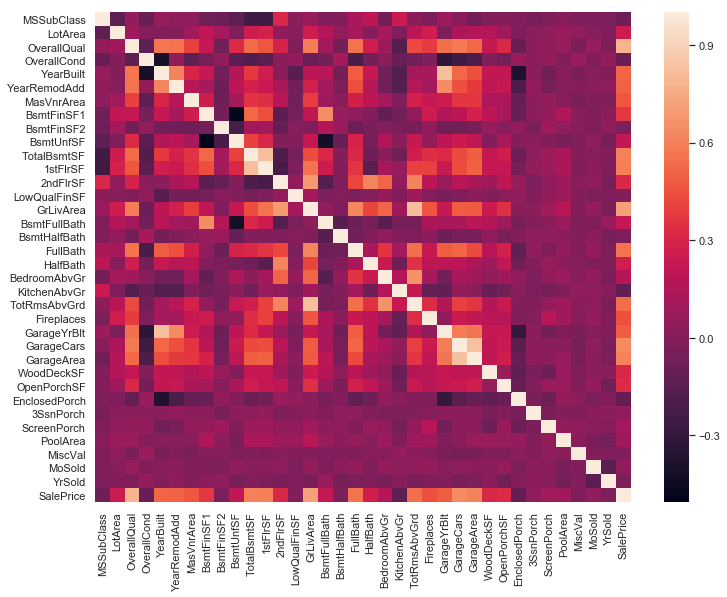

In [415]:
corrmat = data_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

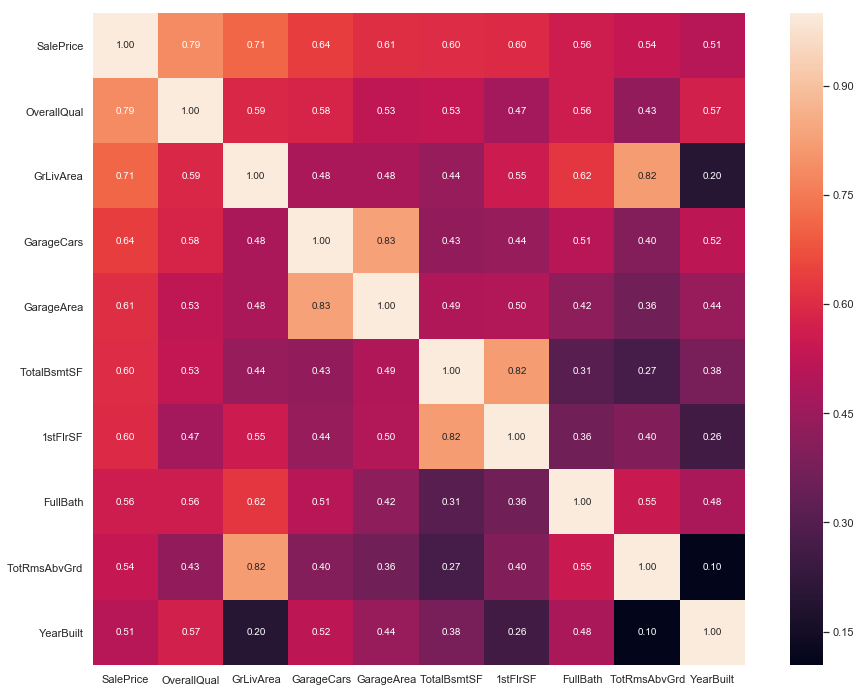

In [416]:
f, ax = plt.subplots(figsize=(16, 12))
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_2[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
"""plt.yticks(rotation=0)
plt.xticks(rotation=90)"""
plt.show()

# Analysis 
1. SalesPrice (target) had a strong correlation with OverallQual (0.79) and GrLivArea (0.71)
2. GrLivArea has strong correlation with TotRmsAvbGrd (0.83)
3. GarageCars has strong correlation with GarrageArea 
4. 1stFirSF has strong correlation with TotalBsmtSM

In [417]:
data_2.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [418]:
corr_features = ['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', '1stFlrSF']

In [419]:
data_2.shape

(1371, 36)

In [420]:
data_3 = data_2.drop(corr_features, axis=1)

In [421]:
"""sns.set()
feat = ['SalePrice','OverallQual','GrLivArea','TotRmsAbvGrd','GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF']
sns.pairplot(data[feat], size=2.5)
plt.show()"""

"sns.set()\nfeat = ['SalePrice','OverallQual','GrLivArea','TotRmsAbvGrd','GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF']\nsns.pairplot(data[feat], size=2.5)\nplt.show()"

In [422]:
"""sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[feat], size=2.5)
plt.show()"""

"sns.set()\ncols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']\nsns.pairplot(data[feat], size=2.5)\nplt.show()"

In [423]:
"""data[feat].head(20)"""

'data[feat].head(20)'

In [424]:
"""f, (ax1, ax2, ax3) = plt.subplots(1, 3)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000), ax=ax1)
data.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax2)
data.plot.scatter(x='2ndFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax3)
plt.show()"""

"f, (ax1, ax2, ax3) = plt.subplots(1, 3)\ndata.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000), ax=ax1)\ndata.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax2)\ndata.plot.scatter(x='2ndFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax3)\nplt.show()"

In [425]:
y = data_3['SalePrice']
X = data_3.drop('SalePrice', axis=1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
model = linear.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_absolute_percentage_error(y_test, predictions)

14.506834945553242

In [426]:
# We see that it's better to use correlated data. It gives better result of the prediction 

In [427]:
# Polimial regression use

In [428]:
from sklearn.preprocessing import PolynomialFeatures
y = data_2['SalePrice']
X = data_2.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train)
poly.fit(X_poly_train, y_train)
model = LinearRegression()
model.fit(X_poly_train, y_train)
y_poly_pred = model.predict(pol.fit_transform(X_test))
mean_absolute_percentage_error(y_test, y_poly_pred)

51.74169622379511

In [429]:
# Lasso

In [430]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [431]:
y_pred_lasso = clf.predict(X_test)

In [432]:
mean_absolute_percentage_error(y_test, y_pred_lasso)

12.585787300433509

In [433]:
from sklearn.linear_model import Ridge

In [434]:
rid = Ridge(alpha=1.0)
rid.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [435]:
y_pred_rid = rid.predict(X_test)

In [436]:
mean_absolute_percentage_error(y_test, y_pred_rid)

12.574873316416186

In [437]:
len(y)

1371

In [438]:
s = range(0,len(y_pred_rid))

In [439]:
s

range(0, 343)

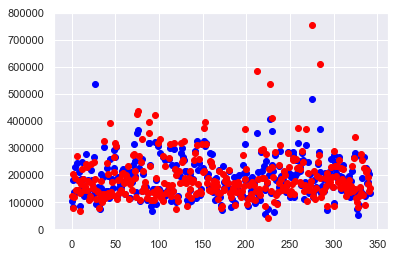

In [440]:
plt.scatter(s, y_pred_rid, color = 'blue') 
plt.scatter(s, y_test, color = 'red') 

In [441]:
# One hot encoding

In [442]:
data_one = data.dropna()
data_one.shape

(1338, 74)

In [443]:
data_categ = data_one[cat_features]
data_categ.shape

(1338, 38)

In [444]:
data_count = data_one.drop(cat_features, axis = 1)

In [445]:
data_count.shape

(1338, 36)

In [461]:
data_count.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1447, 1448, 1451, 1452, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1338)

In [446]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_categ = onehotencoder.fit_transform(data_categ).toarray()

In [447]:
data_categ.shape

(1338, 229)

In [448]:
data_categ = pd.DataFrame(data_categ)

In [449]:
data_categ.shape

(1338, 229)

In [456]:
data_count.shape

(1338, 36)

In [463]:
final = pd.merge(data_count, data_categ, on=data_count.index, how='outer') 

In [464]:
final.shape

(1338, 266)

In [467]:
final = final.drop('key_0', axis=1)

In [468]:
final.shape

(1338, 265)

In [469]:
final.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,219,220,221,222,223,224,225,226,227,228
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [470]:
y = final['SalePrice']

In [472]:
X = final.drop('SalePrice', axis=1)

In [473]:
y.shape, X.shape

((1338,), (1338, 264))

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
model = linear.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_absolute_percentage_error(y_test, predictions)

10.989882727152022

In [ ]:
# Ridge with one-hot

In [476]:
rid = Ridge(alpha=1.0)
rid.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [477]:
y_pred_rid = rid.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred_rid)

11.652285442923665

In [475]:
# Trees 

In [478]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [479]:
mean_absolute_percentage_error(y_test, y_pred)

19.536348560570126

In [483]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# Cross validation 

In [489]:
from sklearn.model_selection import KFold
X = X
y = y
kf = KFold(n_splits=5)